<a href="https://colab.research.google.com/github/m-bashari-m/sample-DNN-projects/blob/main/3.2_LR_finder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://raw.githubusercontent.com/m-bashari-m/tf2-tutorial/master/callbacks/learningratefinder.py lr-finder.py

--2022-03-03 16:42:38--  https://raw.githubusercontent.com/m-bashari-m/tf2-tutorial/master/callbacks/learningratefinder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5439 (5.3K) [text/plain]
Saving to: ‘learningratefinder.py’

learningratefinder. 100%[===================>]   5.31K  --.-KB/s    in 0s      

2022-03-03 16:42:38 (53.2 MB/s) - ‘learningratefinder.py’ saved [5439/5439]

--2022-03-03 16:42:38--  http://lr-finder.py/
Resolving lr-finder.py (lr-finder.py)... failed: Name or service not known.
wget: unable to resolve host address ‘lr-finder.py’
FINISHED --2022-03-03 16:42:39--
Total wall clock time: 0.1s
Downloaded: 1 files, 5.3K in 0s (53.2 MB/s)


In [2]:
!wget https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
!mkdir dataset
!wget https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat -P dataset

--2022-03-03 16:46:48--  https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 929 [text/plain]
Saving to: ‘dataset.py’

dataset.py          100%[===================>]     929  --.-KB/s    in 0s      

2022-03-03 16:46:48 (81.8 MB/s) - ‘dataset.py’ saved [929/929]

--2022-03-03 16:46:48--  https://github.com/Alireza-Akhavan/SRU-deeplearning-workshop/raw/master/dataset/Data_hoda_full.mat
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Alireza-Akhavan/SRU-deeplearning-workshop/master/dataset/Data_hoda_full.mat 

In [3]:
from learningratefinder import LearningRateFinder as LRFinder 
from tensorflow import keras
from keras import layers
from keras.models import Sequential
import numpy as np
from dataset import load_hoda
import matplotlib.pyplot as plt

In [5]:
np.random.seed(123)  # for reproducibility

# Load pre-shuffled HODA data into train and test sets
x_train_original, y_train_original, x_test_original, y_test_original = load_hoda(
                                                                        training_sample_size=3500,
                                                                        test_sample_size=400,size=28)

In [6]:
# Preprocess input data
''' 3.1: input data in numpy array format'''
x_train = np.array(x_train_original)
x_test = np.array(x_test_original)

x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') /255

# Reshape to original image shape (n x 784)  ==> (n x 28 x 28 x 1)
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)


# 4. Preprocess class labels
y_train = keras.utils.to_categorical(y_train_original, num_classes=10)
y_test = keras.utils.to_categorical(y_test_original, num_classes=10)


In [7]:
# test and validation set
x_val = x_test[:200]
x_test = x_test[200:]
y_val = y_test[:200]
y_test = y_test[200:]

In [55]:
# 5. Define model architecture
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


# 6. Compile model
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [12]:
MIN_LR = 1e-10
MAX_LR = 1

Epoch 1/19
110/110 [==============================] - 4s 27ms/step - loss: 2.3273 - accuracy: 0.0840
Epoch 2/19
110/110 [==============================] - 3s 26ms/step - loss: 2.3273 - accuracy: 0.0809
Epoch 3/19
110/110 [==============================] - 3s 27ms/step - loss: 2.3278 - accuracy: 0.0823
Epoch 4/19
110/110 [==============================] - 3s 27ms/step - loss: 2.3297 - accuracy: 0.0829
Epoch 5/19
110/110 [==============================] - 3s 26ms/step - loss: 2.3269 - accuracy: 0.0923
Epoch 6/19
110/110 [==============================] - 3s 26ms/step - loss: 2.3281 - accuracy: 0.0866
Epoch 7/19
110/110 [==============================] - 3s 27ms/step - loss: 2.3274 - accuracy: 0.0826
Epoch 8/19
110/110 [==============================] - 3s 27ms/step - loss: 2.3264 - accuracy: 0.0929
Epoch 9/19
110/110 [==============================] - 3s 27ms/step - loss: 2.3193 - accuracy: 0.0897
Epoch 10/19
110/110 [==============================] - 3s 26ms/step - loss: 2.3047 - accura

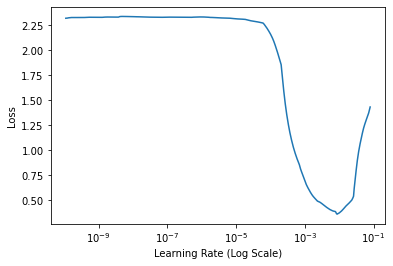

In [13]:
lr_finder = LRFinder(model)
lr_finder.find((x_train, y_train), MIN_LR, MAX_LR)
lr_finder.plot_loss()

In [56]:
def get_lr(epoch, lr):
  min_lr = 1e-4
  max_lr = 1e-3
  steps_to_decay = 20
  if epoch % steps_to_decay == 0:

    if lr > min_lr: 
      return lr / (1 + epoch // steps_to_decay)
    else:
      return min_lr

  return lr

In [57]:
lr_schedular = keras.callbacks.LearningRateScheduler(get_lr)

In [58]:
history = model.fit(x_train, y_train,
                    epochs=80,
                    batch_size=256,
                    validation_data = (x_val, y_val),
                    callbacks=[lr_schedular])


Epoch 1/80
14/14 [==============================] - 3s 184ms/step - loss: 2.0155 - accuracy: 0.3443 - val_loss: 1.3399 - val_accuracy: 0.7650 - lr: 0.0010
Epoch 2/80
14/14 [==============================] - 2s 173ms/step - loss: 1.1330 - accuracy: 0.6403 - val_loss: 0.5074 - val_accuracy: 0.8700 - lr: 0.0010
Epoch 3/80
14/14 [==============================] - 2s 173ms/step - loss: 0.6781 - accuracy: 0.7760 - val_loss: 0.3101 - val_accuracy: 0.9000 - lr: 0.0010
Epoch 4/80
14/14 [==============================] - 2s 172ms/step - loss: 0.4872 - accuracy: 0.8360 - val_loss: 0.2272 - val_accuracy: 0.9250 - lr: 0.0010
Epoch 5/80
14/14 [==============================] - 2s 172ms/step - loss: 0.4072 - accuracy: 0.8663 - val_loss: 0.2201 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 6/80
14/14 [==============================] - 2s 173ms/step - loss: 0.3385 - accuracy: 0.8849 - val_loss: 0.1827 - val_accuracy: 0.9400 - lr: 0.0010
Epoch 7/80
14/14 [==============================] - 2s 173ms/step - lo

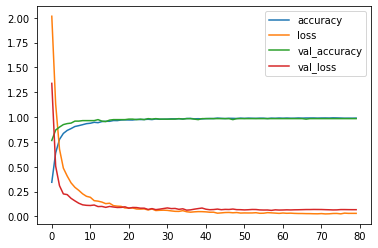

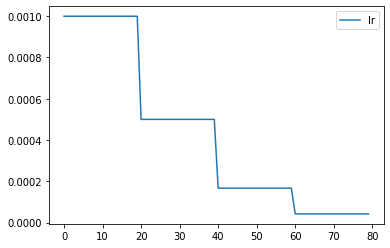

In [67]:
import pandas as pd
history_df = pd.DataFrame(history.history)
history_df.loc[:, history_df.columns.difference(['lr'])].plot()
history_df.loc[:, ['lr']].plot()